In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [11]:
df = pd.read_csv(r"C:\Users\lalin\Downloads\netflix1.csv")

In [13]:
print("Shape:", df.shape)



Shape: (8790, 10)


In [15]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [17]:
print("\nData Types:\n", df.dtypes)


Data Types:
 show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [19]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [21]:
df.drop_duplicates(inplace=True)

In [23]:
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'])

In [27]:
df['rating'] = df['rating'].fillna('Unknown')
df.dropna(subset=['title'], inplace=True)


In [31]:

df.columns = df.columns.str.strip()

for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()


In [33]:
print("\nCount by Type:\n", df['type'].value_counts())



Count by Type:
 type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [35]:
if 'listed_in' in df.columns:
    from collections import Counter
    genre_counter = Counter()
    df['listed_in'].dropna().apply(lambda x: genre_counter.update(x.split(", ")))
    print("\nTop Genres:\n", genre_counter.most_common(10))



Top Genres:
 [('International Movies', 2752), ('Dramas', 2426), ('Comedies', 1674), ('International TV Shows', 1349), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 762), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\2647943191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


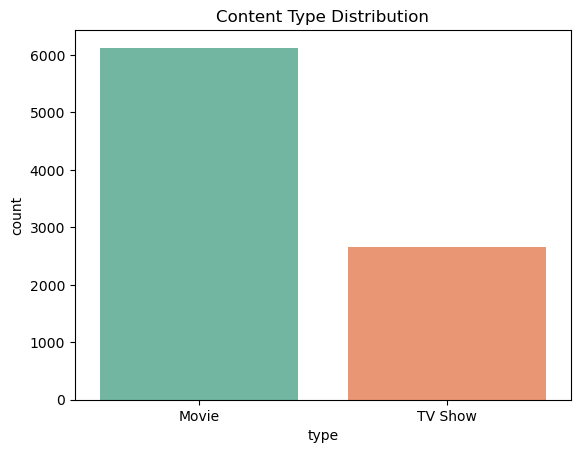

In [37]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\3562634652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


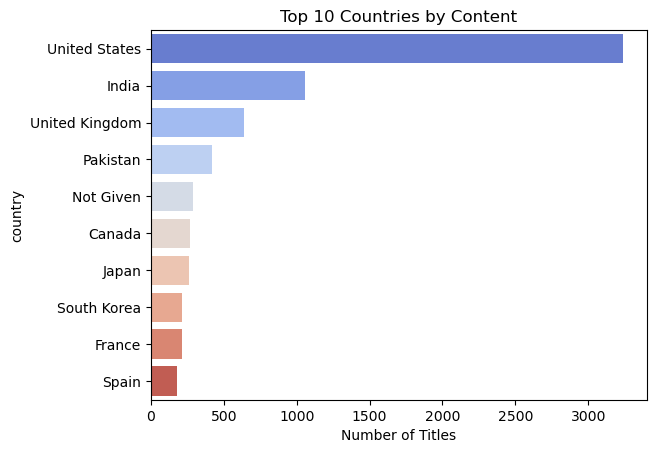

In [39]:
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
    plt.title("Top 10 Countries by Content")
    plt.xlabel("Number of Titles")
    plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\41347860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()), palette='mako')


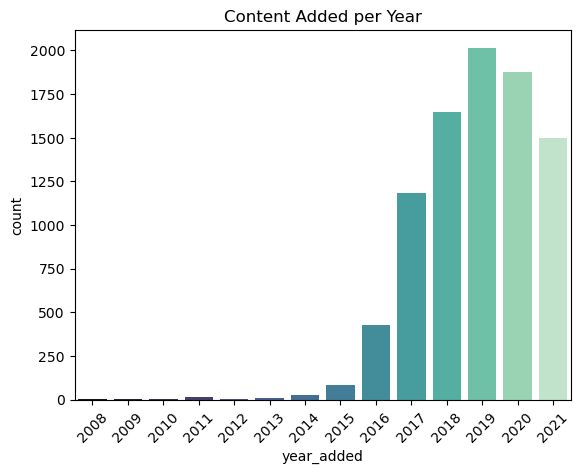

In [41]:
if 'date_added' in df.columns:
    df['year_added'] = df['date_added'].dt.year
    sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()), palette='mako')
    plt.title("Content Added per Year")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\188070402.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')


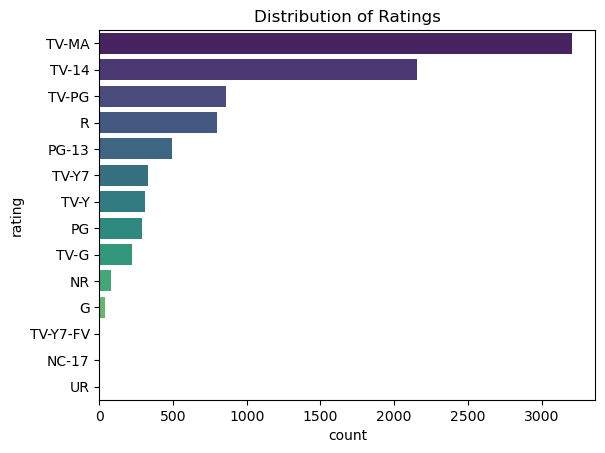

In [43]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribution of Ratings")
plt.show()

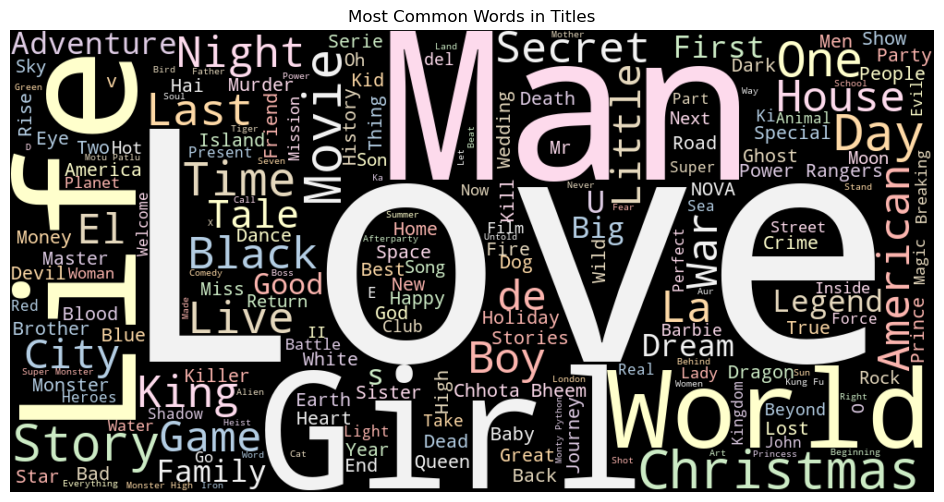

In [45]:
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Pastel1').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Titles")
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\3835624678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', order=month_order, palette='flare')


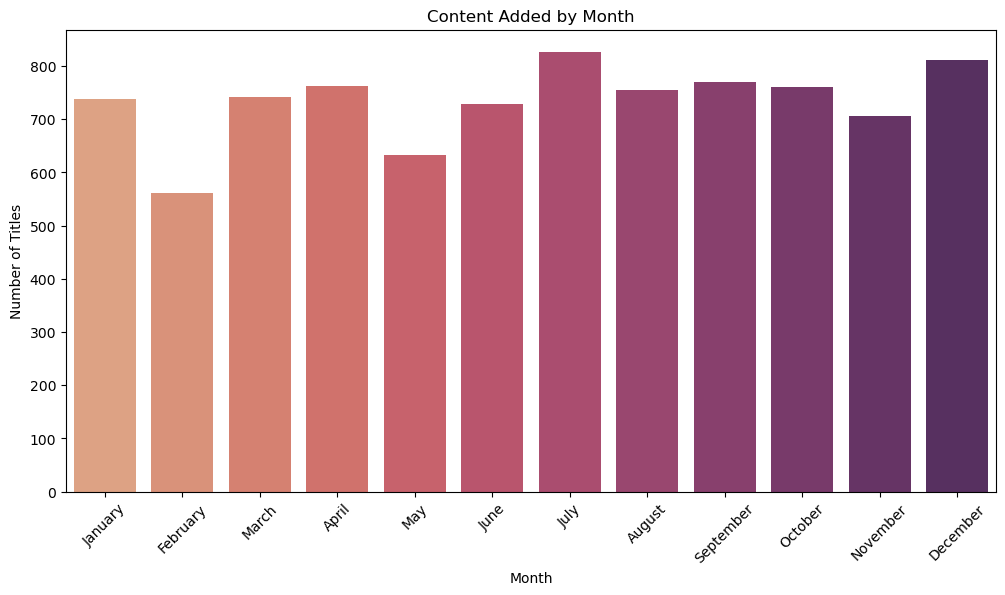

In [49]:
if 'date_added' in df.columns:
    df['month_added'] = df['date_added'].dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']

    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x='month_added', order=month_order, palette='flare')
    plt.title("Content Added by Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Titles")
    plt.xticks(rotation=45)
    plt.show()


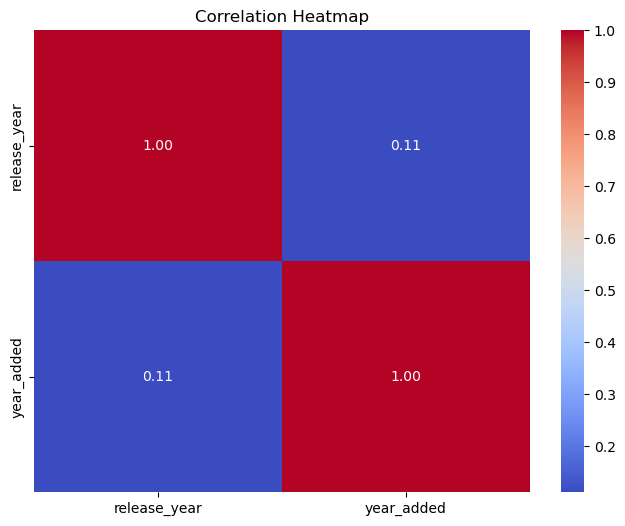

In [51]:
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\3590154186.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movie_genres, x='Count', y='Genre', ax=axs[0], palette='Blues_r')
C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\3590154186.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tv_genres, x='Count', y='Genre', ax=axs[1], palette='Oranges_r')


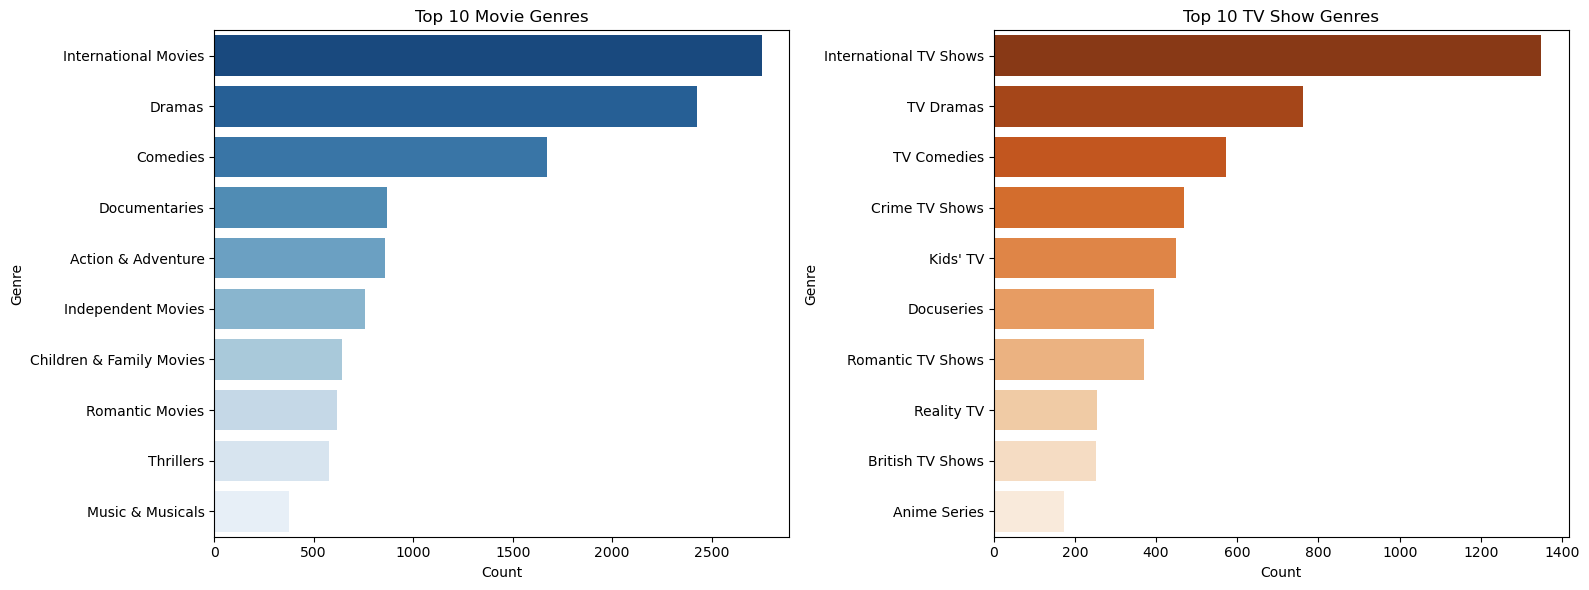

In [53]:
from collections import Counter

def get_top_genres_by_type(content_type):
    genre_counter = Counter()
    df[df['type'] == content_type]['listed_in'].dropna().apply(lambda x: genre_counter.update(x.split(', ')))
    return pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

# Top 10 Movie genres
top_movie_genres = get_top_genres_by_type('Movie')
top_tv_genres = get_top_genres_by_type('TV Show')

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_movie_genres, x='Count', y='Genre', ax=axs[0], palette='Blues_r')
axs[0].set_title("Top 10 Movie Genres")

sns.barplot(data=top_tv_genres, x='Count', y='Genre', ax=axs[1], palette='Oranges_r')
axs[1].set_title("Top 10 TV Show Genres")

plt.tight_layout()
plt.show()


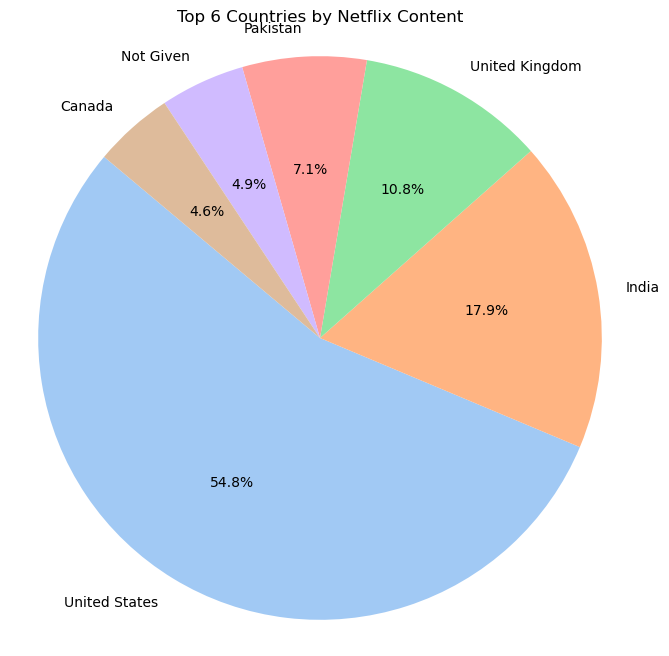

In [55]:
top_countries = df['country'].value_counts().head(6)
plt.figure(figsize=(8,8))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 6 Countries by Netflix Content")
plt.axis('equal')
plt.show()


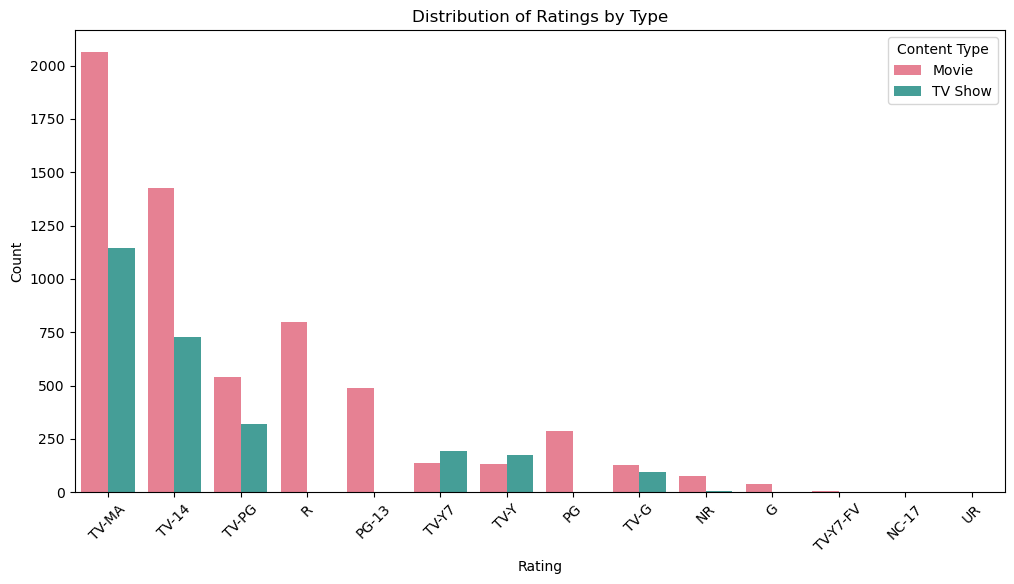

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='husl')
plt.title("Distribution of Ratings by Type")
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()


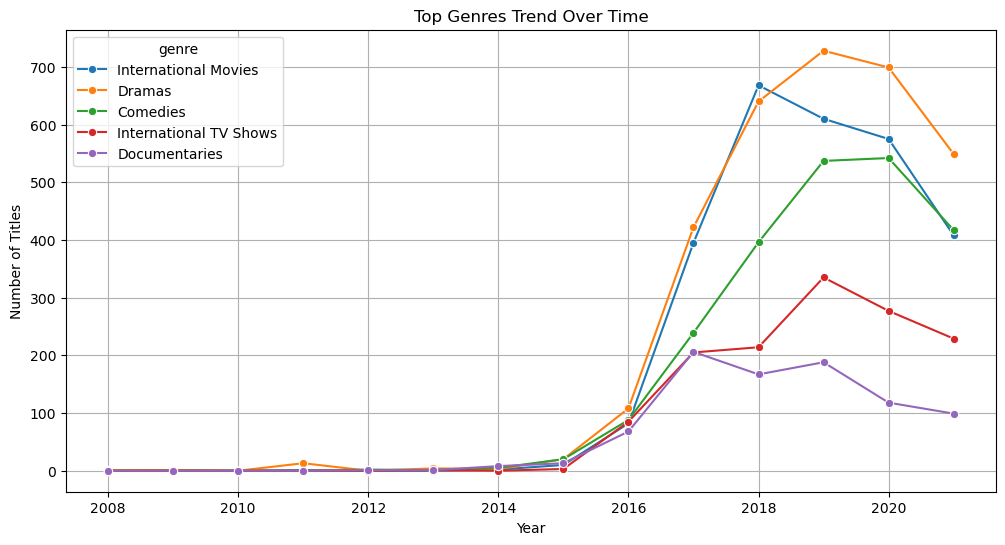

In [59]:
from collections import defaultdict

# Genre-Year distribution (top 5 genres)
top_genres = [genre for genre, _ in Counter(', '.join(df['listed_in'].dropna()).split(', ')).most_common(5)]
genre_year_df = defaultdict(list)

for genre in top_genres:
    for year in sorted(df['year_added'].dropna().unique()):
        count = df[df['year_added'] == year]['listed_in'].dropna().apply(lambda x: genre in x).sum()
        genre_year_df['year'].append(year)
        genre_year_df['genre'].append(genre)
        genre_year_df['count'].append(count)

genre_trend = pd.DataFrame(genre_year_df)

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x='year', y='count', hue='genre', marker='o', palette='tab10')
plt.title("Top Genres Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


C:\Users\lalin\AppData\Local\Temp\ipykernel_11888\246322013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lang_by_country.values, y=top_lang_by_country.index, palette='Set1')


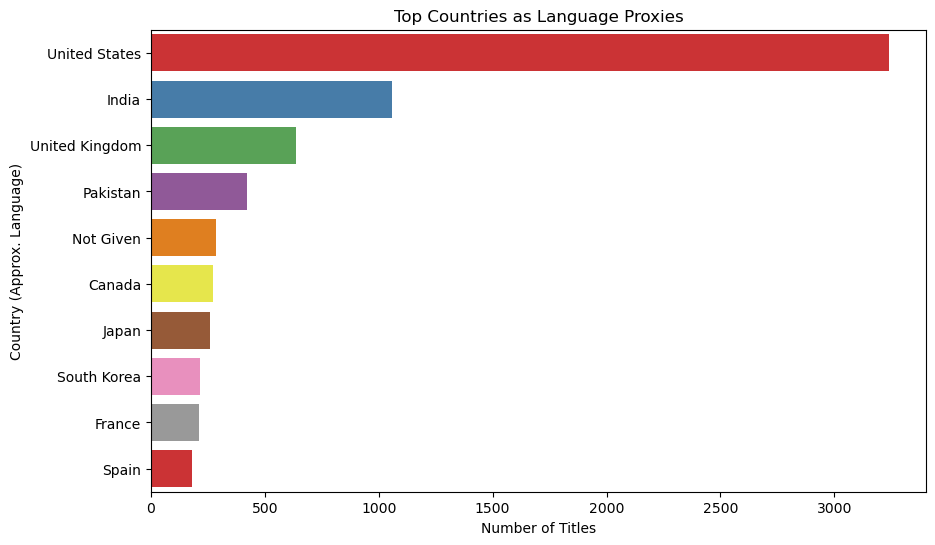

In [61]:
top_lang_by_country = df['country'].dropna().apply(lambda x: x.split(',')[0]).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_lang_by_country.values, y=top_lang_by_country.index, palette='Set1')
plt.title("Top Countries as Language Proxies")
plt.xlabel("Number of Titles")
plt.ylabel("Country (Approx. Language)")
plt.show()
